In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/property-data/train.csv
/kaggle/input/property-data/test.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [2]:
train_data = pd.read_csv("/kaggle/input/property-data/train.csv")
test_data = pd.read_csv("/kaggle/input/property-data/test.csv")

In [3]:
train_count, test_count = len(train_data), len(test_data)

In [4]:
print(len(train_data), len(test_data))

6256 1564


In [5]:
train_data.head()

,index,Address,Possesion,Furnishing,Buildup_area,Carpet_area,Bathrooms,Property_age,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
0,6250,"Arihant housing society, Sai Nagar, Kandivali ...",Ready to move,Semi Furnished,615.0,508.043150,1.0,12,0,14500000,14500000.0,7.0,23580.0,2.0,2.0
1,6523,"5 year tower, I C Colony, Borivali West, Mumbai",Ready to move,Semi Furnished,1200.0,724.772558,3.0,5,1,18500000,18500000.0,13.0,15420.0,2.0,2.0
2,4286,"Windsor Grande Residences, Mhada Colony, Andhe...",Ready to move,Semi Furnished,3300.0,2300.000000,5.0,6,3,125000000,1250000.0,32.0,37880.0,4.0,4.0
3,5038,"Maharashtra Nagar, Borivali West, Mumbai",Ready to move,Unfurnished,800.0,642.570682,1.0,25,1,16000000,16000000.0,4.0,20000.0,2.0,2.0
4,8491,"Bandra West, Mumbai",Ready to move,Semi Furnished,2000.0,1602.321210,4.0,10,2,85000000,85000000.0,12.0,42500.0,3.0,3.0


In [6]:
data = pd.concat([train_data, test_data], axis=0)

In [7]:
data.columns

Index(['index', 'Address', 'Possesion', 'Furnishing', 'Buildup_area',
       'Carpet_area', 'Bathrooms', 'Property_age', 'Parking', 'Price',
       'Brokerage', 'Floor', 'Per_sqft_price', 'BHK', 'Total_bedrooms'],
      dtype='object')

In [8]:
print(data.shape)

(7820, 15)


In [9]:
data.nunique()

index             7820
Address           3725
Possesion            1
Furnishing           3
Buildup_area      1038
Carpet_area       2893
Bathrooms          104
Property_age        46
Parking             10
Price              832
Brokerage         1785
Floor              132
Per_sqft_price    2801
BHK                  9
Total_bedrooms      32
dtype: int64

In [10]:
data_num = data.select_dtypes(include=['number'])

stats = data_num.describe(percentiles=[0.25, 0.5, 0.75]).transpose()

print("Statistical Analysis:")
print(stats)

Statistical Analysis:
                 count          mean           std       min           25%  \
index           7820.0  4.873975e+03  2.766650e+03       1.0  2.497750e+03   
Buildup_area    7820.0  1.116096e+03  7.222222e+02     180.0  6.500000e+02   
Carpet_area     7820.0  8.620953e+02  5.733111e+02     150.0  4.738816e+02   
Bathrooms       7820.0  1.973660e+00  9.005205e-01       1.0  1.000000e+00   
Property_age    7820.0  7.471611e+00  7.217703e+00       1.0  2.000000e+00   
Parking         7820.0  1.303581e+00  7.970482e-01       0.0  1.000000e+00   
Price           7820.0  3.038559e+07  3.719014e+07  780000.0  1.050000e+07   
Brokerage       7820.0  1.131909e+07  3.102861e+07       0.0  9.999900e+04   
Floor           7820.0  1.993028e+01  1.396096e+01       2.0  1.000000e+01   
Per_sqft_price  7820.0  2.340171e+04  1.300058e+04    1440.0  1.560000e+04   
BHK             7820.0  2.154923e+00  9.999399e-01       1.0  1.000000e+00   
Total_bedrooms  7820.0  2.201048e+00  9.79

#  Dropping less relevent columns

In [11]:
cor_matrix = data.select_dtypes(include=['number']).corr()
print(cor_matrix['Price'])

index             0.055963
Buildup_area      0.846042
Carpet_area       0.901236
Bathrooms         0.351969
Property_age      0.067920
Parking           0.510326
Price             1.000000
Brokerage         0.666312
Floor             0.302355
Per_sqft_price    0.750540
BHK               0.684593
Total_bedrooms    0.674082
Name: Price, dtype: float64


In [12]:
data = data.drop(columns=["index", "Address", "Property_age"], inplace=False)

In [13]:
columns_string = data.select_dtypes(include=['object']).columns

for col in columns_string:
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])

data.head()

,Possesion,Furnishing,Buildup_area,Carpet_area,Bathrooms,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
0,0,1,615.0,508.043150,1.0,0,14500000,14500000.0,7.0,23580.0,2.0,2.0
1,0,1,1200.0,724.772558,3.0,1,18500000,18500000.0,13.0,15420.0,2.0,2.0
2,0,1,3300.0,2300.000000,5.0,3,125000000,1250000.0,32.0,37880.0,4.0,4.0
3,0,2,800.0,642.570682,1.0,1,16000000,16000000.0,4.0,20000.0,2.0,2.0
4,0,1,2000.0,1602.321210,4.0,2,85000000,85000000.0,12.0,42500.0,3.0,3.0


In [14]:
columns_string

Index(['Possesion', 'Furnishing'], dtype='object')

In [15]:
data.nunique()

Possesion            1
Furnishing           3
Buildup_area      1038
Carpet_area       2893
Bathrooms          104
Parking             10
Price              832
Brokerage         1785
Floor              132
Per_sqft_price    2801
BHK                  9
Total_bedrooms      32
dtype: int64

In [16]:
data = data.drop(columns=['Possesion'], inplace=False)
data.nunique()

Furnishing           3
Buildup_area      1038
Carpet_area       2893
Bathrooms          104
Parking             10
Price              832
Brokerage         1785
Floor              132
Per_sqft_price    2801
BHK                  9
Total_bedrooms      32
dtype: int64

In [17]:
scaler = StandardScaler()

features, target = data.drop(columns=['Price']), data['Price']

scaled_features = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_features, columns=features.columns, index=data.index)

scaled_data = pd.concat([scaled_data, target], axis=1)

In [18]:
scaled_data.head()

,Furnishing,Buildup_area,Carpet_area,Bathrooms,Parking,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms,Price
0,-0.377586,-0.693869,-0.617596,-1.081288,-1.635615,0.102522,-0.926233,0.013715,-0.154942,-0.205190,14500000
1,-0.377586,0.116183,-0.239541,1.139792,-0.380905,0.231443,-0.496436,-0.613990,-0.154942,-0.205190,18500000
2,-0.377586,3.024061,2.508231,3.360871,2.128514,-0.324531,0.864589,1.113736,1.845306,1.836018,125000000
3,1.077673,-0.437699,-0.382931,-1.081288,-0.380905,0.150867,-1.141132,-0.261675,-0.154942,-0.205190,16000000
4,-0.377586,1.223946,1.291224,2.250331,0.873804,2.374764,-0.568069,1.469127,0.845182,0.815414,85000000


# Creating Price Categories

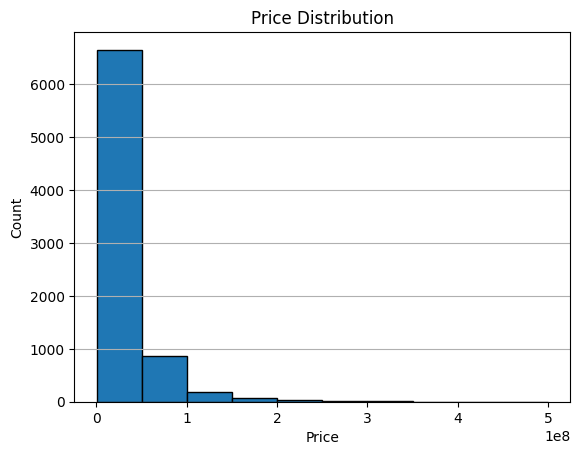

In [19]:
plt.hist(scaled_data['Price'], bins=10, edgecolor='black')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

In [20]:
price_bins = [0, 25000000, 50000000, 75000000, float('inf')]
price_labels = ["Low", "Medium", "High", "Very High"]

scaled_data['Price_Category'] = pd.cut(scaled_data["Price"], bins=price_bins, labels=price_labels, right=False)

In [21]:
pd.concat((scaled_data['Price'], scaled_data['Price_Category']), axis=1)

,Price,Price_Category
0,14500000,Low
1,18500000,Low
2,125000000,Very High
3,16000000,Low
4,85000000,Very High
...,...,...
1559,9500000,Low
1560,10500000,Low
1561,14000000,Low
1562,7000000,Low


In [22]:
print("Price categories distribution:")
print(scaled_data["Price_Category"].value_counts())

Price categories distribution:
Price_Category
Low          4805
Medium       1795
Very High     612
High          608
Name: count, dtype: int64


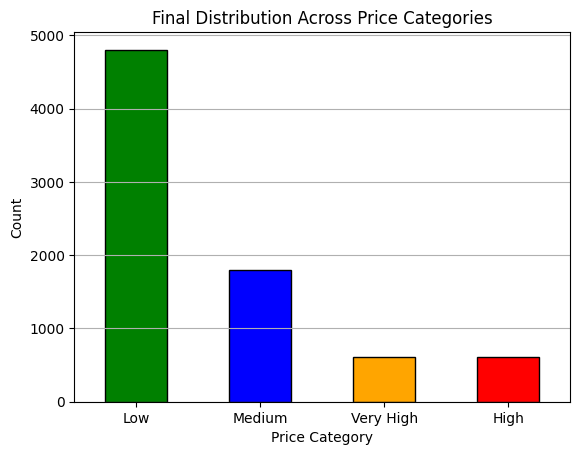

In [23]:
scaled_data['Price_Category'].value_counts().plot(kind="bar", color=["green", "blue", "orange", "red"], edgecolor="black")
plt.title("Final Distribution Across Price Categories")
plt.xlabel("Price Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [24]:
category_proportion = scaled_data['Price_Category'].value_counts(normalize=True) * 100
print("Proportion of Properties in Each Price Category:")
print(category_proportion)

Proportion of Properties in Each Price Category:
Price_Category
Low          61.445013
Medium       22.953964
Very High     7.826087
High          7.774936
Name: proportion, dtype: float64


In [37]:
X0 = features
y0 = target

In [25]:
X = scaled_data.drop(columns=["Price_Category"])
y = scaled_data["Price_Category"]

In [31]:
random_under = RandomUnderSampler(random_state=42)
X_under, y_under = random_under.fit_resample(X, y)

print(y_under.value_counts())

Price_Category
Low          608
Medium       608
High         608
Very High    608
Name: count, dtype: int64


In [32]:
pd.concat([X_under['Price'], y_under], axis=1)

,Price,Price_Category
25,70000000,High
70,57500000,High
72,67000000,High
125,57600000,High
135,60000000,High
...,...,...
4,85000000,Very High
1544,77000000,Very High
217,100000000,Very High
1217,75000000,Very High


In [33]:
random_over = RandomOverSampler(random_state=42)
X_over, y_over = random_over.fit_resample(X, y)

print(y_over.value_counts())

Price_Category
Low          4805
Medium       4805
High         4805
Very High    4805
Name: count, dtype: int64


In [34]:
pd.concat([X_over['Price'], y_over], axis=1)

,Price,Price_Category
0,14500000,Low
1,18500000,Low
2,125000000,Very High
3,16000000,Low
4,85000000,Very High
...,...,...
19215,360000000,Very High
19216,160000000,Very High
19217,155000000,Very High
19218,85000000,Very High


In [35]:
X_over.columns

Index(['Furnishing', 'Buildup_area', 'Carpet_area', 'Bathrooms', 'Parking',
       'Brokerage', 'Floor', 'Per_sqft_price', 'BHK', 'Total_bedrooms',
       'Price'],
      dtype='object')

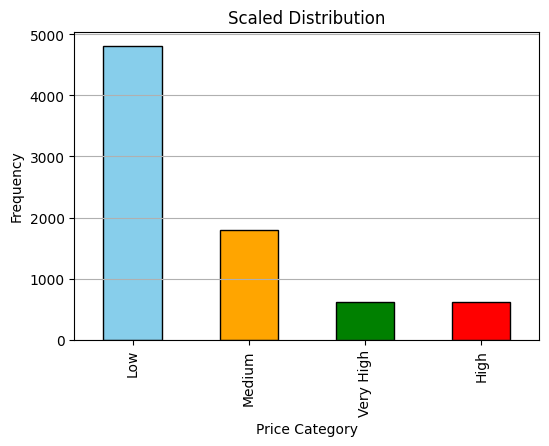

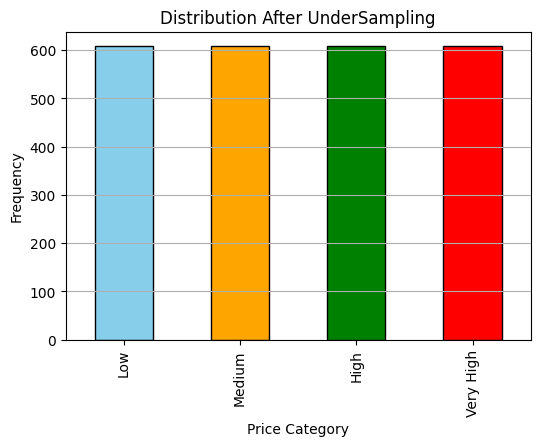

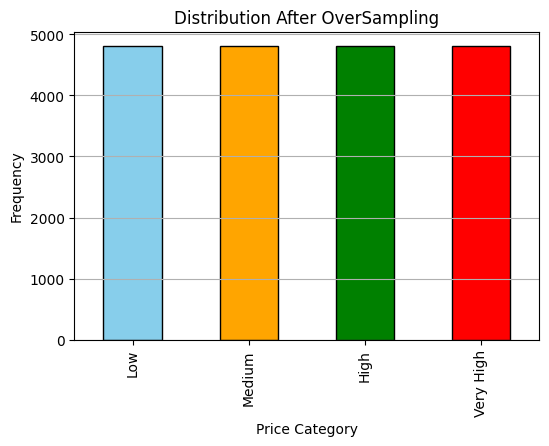

In [42]:
def plot_class_distribution(y, title):
    plt.figure(figsize=(6, 4))
    y.value_counts().plot(kind='bar', color=['skyblue', 'orange', 'green', 'red'], edgecolor='k')
    plt.title(title)
    plt.xlabel('Price Category')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

plot_class_distribution(y, "Scaled Distribution")
plot_class_distribution(y_under, "Distribution After UnderSampling")
plot_class_distribution(y_over, "Distribution After OverSampling")

# Model Training

In [43]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [44]:
# over_train_count = (train_count * len(X_over)) // (train_count + test_count)
# under_train_count = (train_count * len(X_under)) // (train_count + test_count)
test_size = test_count / (train_count + test_count)

# print(over_train_count, under_train_count)

y = X['Price']
X = X.drop(columns=['Price'], inplace=False)

y_over = X_over['Price']
X_over = X_over.drop(columns=['Price'], inplace=False)

y_under = X_under['Price']
X_under = X_under.drop(columns=['Price'], inplace=False)

In [49]:
X_train0, X_test0, y_train0, y_test0 = X0[:train_count], X0[train_count:], y0[:train_count], y0[train_count:]

X_train, X_test, y_train, y_test = X[:train_count], X[train_count:], scaled_data["Price"][:train_count], scaled_data["Price"][train_count:]

# X_train2, X_test2, y_train2, y_test2 = X_over.iloc[:over_train_count, :-1], X_over[over_train_count:, :-1], X_over[:over_train_count, -1], X_over[over_train_count:, -1]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_over, y_over, test_size = test_size, random_state=42)

# X_train3, X_test3, y_train3, y_test3 = X_under.iloc[:under_train_count, :-1], X_under[under_train_count:, :-1], X_under[:under_train_count, -1], X_under[under_train_count:, -1]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_under, y_under, test_size = test_size, random_state=42)

In [50]:
dt_original = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_original.fit(X_train0, y_train0)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [51]:
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [52]:
dt_over = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_over.fit(X_over, y_over)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [53]:
dt_under = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_under.fit(X_under, y_under)

DecisionTreeRegressor(max_depth=5, random_state=42)

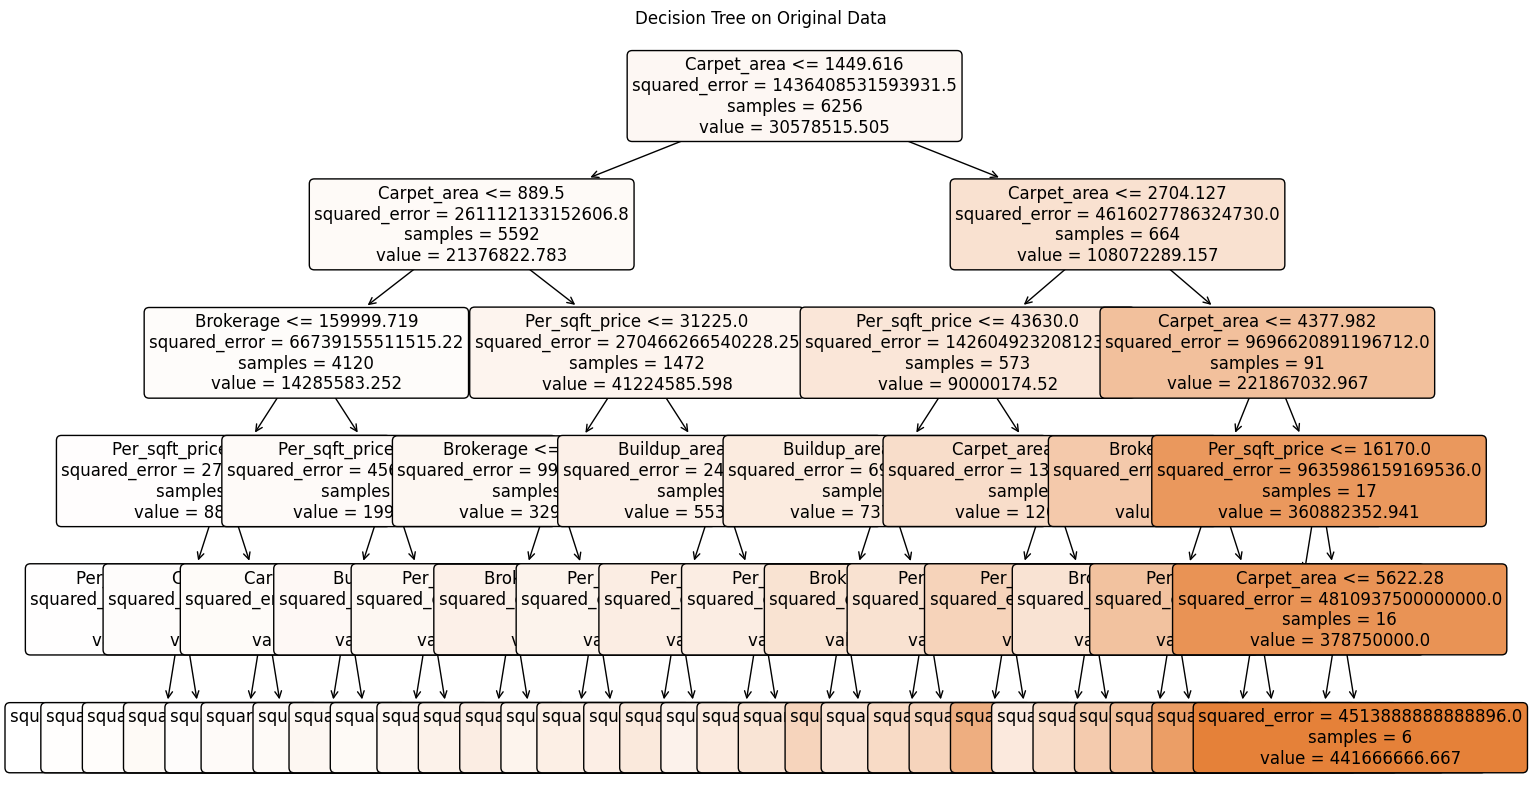

In [54]:
plt.figure(figsize=(16, 10))
plot_tree(
    dt_original,
    feature_names=X_train0.columns,
    filled=True,
    rounded=True,
    proportion=False,
    fontsize=12
)
plt.title("Decision Tree on Original Data")
plt.show()

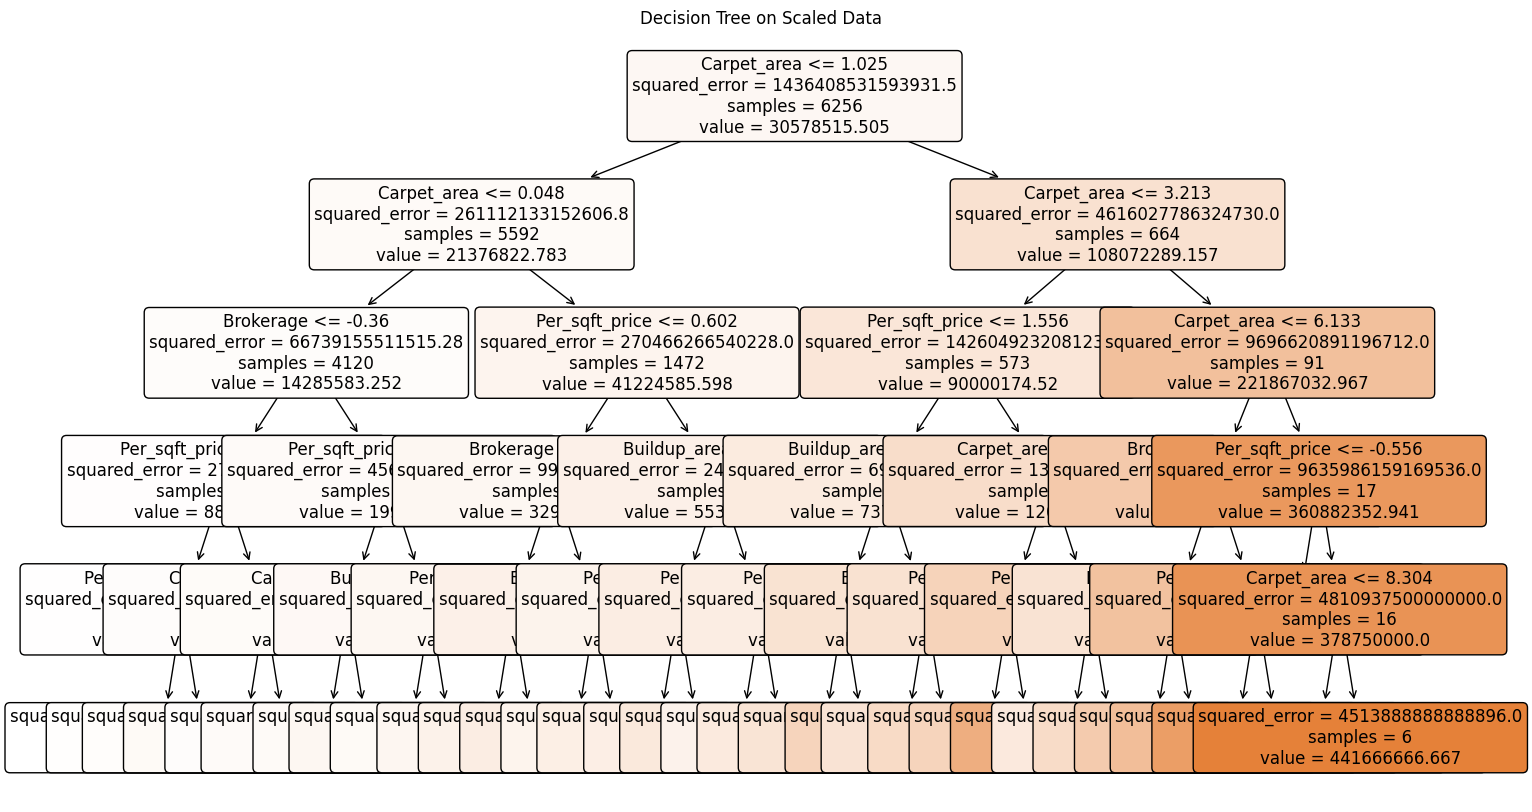

In [55]:
plt.figure(figsize=(16, 10))
plot_tree(
    dt_regressor,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    proportion=False,
    fontsize=12
)
plt.title("Decision Tree on Scaled Data")
plt.show()

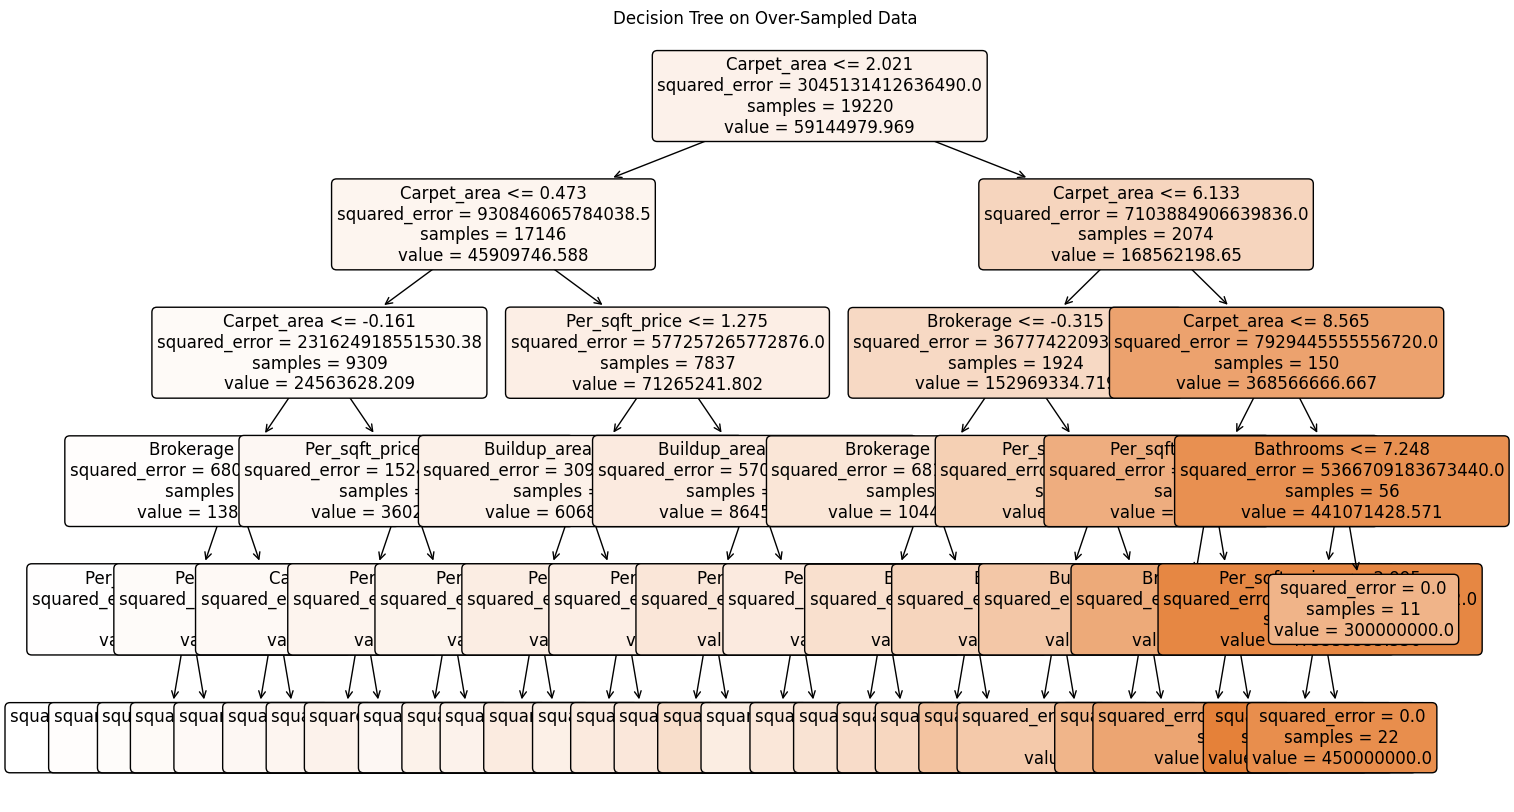

In [56]:
plt.figure(figsize=(16, 10))
plot_tree(
    dt_over,
    feature_names=X_train2.columns,
    filled=True,
    rounded=True,
    proportion=False,
    fontsize=12
)
plt.title("Decision Tree on Over-Sampled Data")
plt.show()

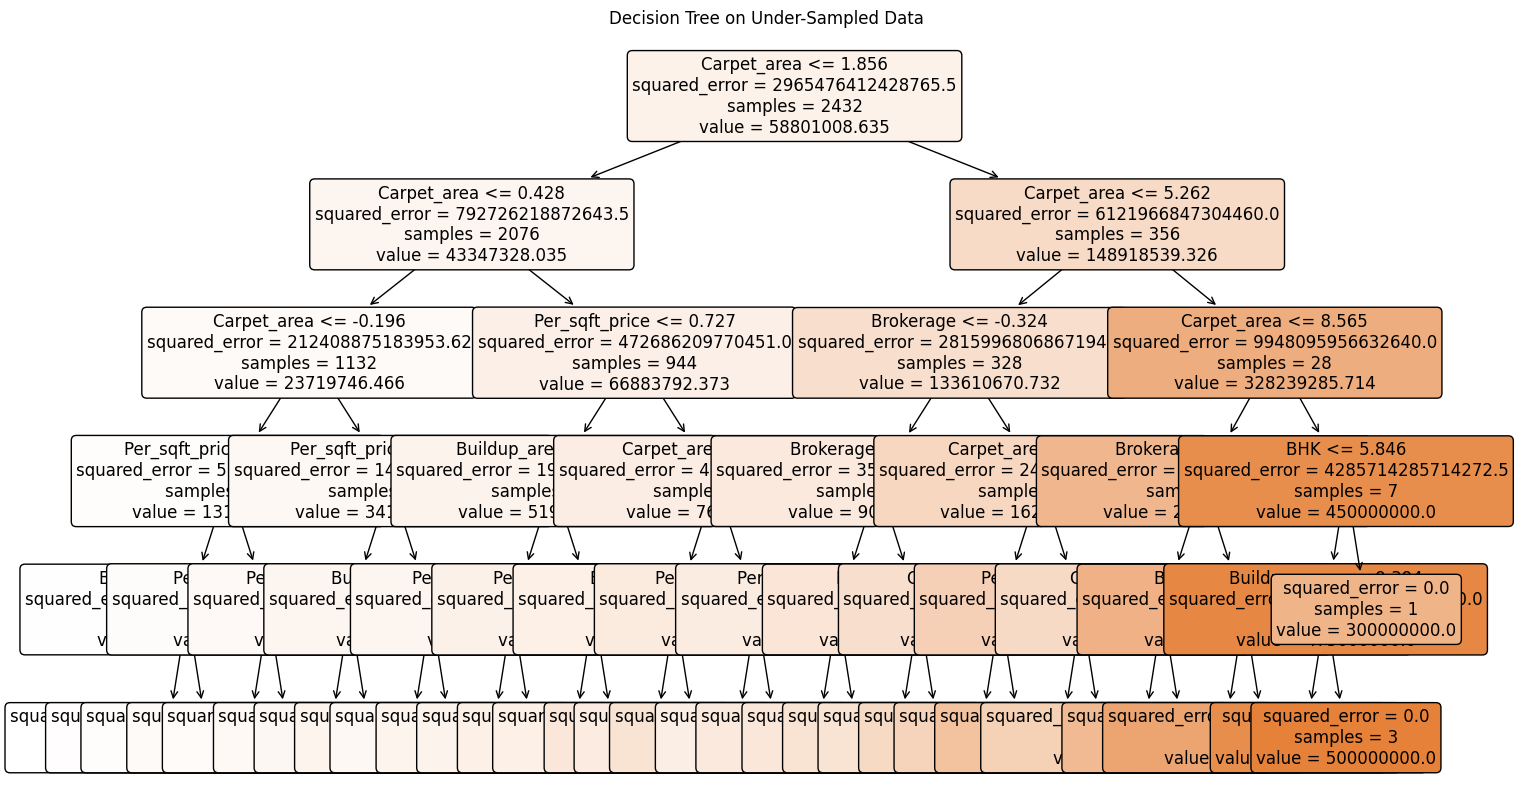

In [57]:
plt.figure(figsize=(16, 10))
plot_tree(
    dt_under,
    feature_names=X_train3.columns,
    filled=True,
    rounded=True,
    proportion=False,
    fontsize=12
)
plt.title("Decision Tree on Under-Sampled Data")
plt.show()

# Feature Importance

In [59]:
feature_importances0 = dt_original.feature_importances_
feature_importances1 = dt_regressor.feature_importances_
feature_importances2 = dt_over.feature_importances_
feature_importances3 = dt_under.feature_importances_

importance_df1 = pd.DataFrame({
    'Feature': X_train.columns,
    'Original Data': feature_importances0,
    'Scaled Data': feature_importances1,
    'OverSampled Data': feature_importances2,
    'UnderSampled Data': feature_importances3
})#.sort_values(by='Importance', ascending=False)

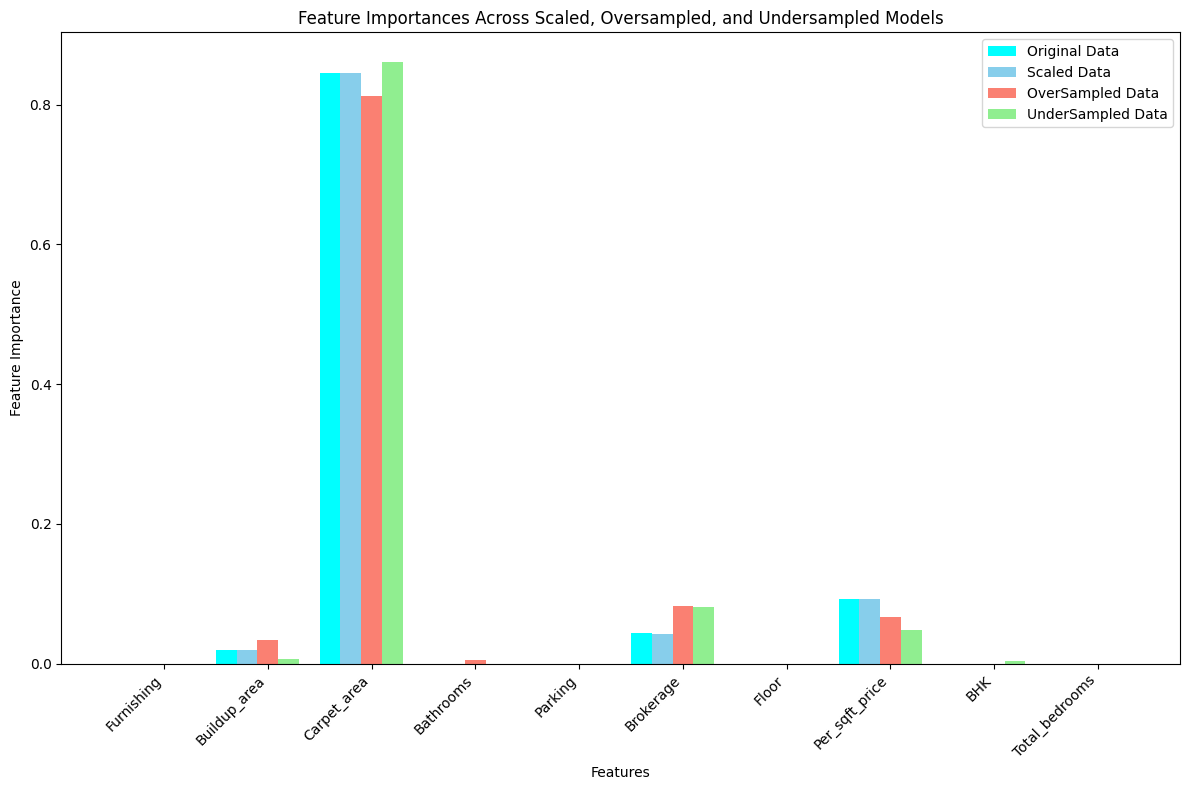

In [61]:
plt.figure(figsize=(12, 8))

num_features = len(importance_df1)
x = np.arange(num_features)

bar_width = 0.2

plt.bar(x - 2*bar_width, importance_df1['Original Data'], width=bar_width, label='Original Data', color='cyan')
plt.bar(x - bar_width, importance_df1['Scaled Data'], width=bar_width, label='Scaled Data', color='skyblue')
plt.bar(x, importance_df1['OverSampled Data'], width=bar_width, label='OverSampled Data', color='salmon')
plt.bar(x + bar_width, importance_df1['UnderSampled Data'], width=bar_width, label='UnderSampled Data', color='lightgreen')

plt.xticks(x, importance_df1['Feature'], rotation=45, ha='right')

plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances Across Scaled, Oversampled, and Undersampled Models')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Hyperparameter Optimization

In [63]:
from sklearn.model_selection import GridSearchCV

In [66]:
params = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

In [67]:
%%time

dt_orig = DecisionTreeRegressor(random_state=42)

gd = GridSearchCV(
    estimator=dt_orig,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

gd.fit(X_train0, y_train0)

best_original = gd.best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
CPU times: user 1.03 s, sys: 177 ms, total: 1.2 s
Wall time: 9.91 s


In [68]:
%%time

dt_scaled = DecisionTreeRegressor(random_state=42)

gd = GridSearchCV(
    estimator=dt_scaled,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

gd.fit(X_train, y_train)

best_scaled = gd.best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
CPU times: user 813 ms, sys: 81.6 ms, total: 894 ms
Wall time: 7.28 s


In [69]:
%%time

dt_over = DecisionTreeRegressor(random_state=42)

gd2 = GridSearchCV(
    estimator=dt_over,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

gd2.fit(X_train2, y_train2)
best_over = gd2.best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
CPU times: user 1.28 s, sys: 197 ms, total: 1.48 s
Wall time: 14.6 s


In [70]:
%%time

dt_under = DecisionTreeRegressor(random_state=42)

gd3 = GridSearchCV(
    estimator=dt_under,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

gd3.fit(X_train3, y_train3)
best_under = gd3.best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
CPU times: user 712 ms, sys: 28.2 ms, total: 740 ms
Wall time: 4.03 s


# Handling Overfitting and Learning Curve

In [71]:
from sklearn.model_selection import cross_val_score, learning_curve

In [72]:
cv_scores = cross_val_score(best_scaled, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

cv_mean = -np.mean(cv_scores)
cv_std = np.std(cv_scores)

print("Cross-Validation Results for Scaled model:")
print("Mean MSE:", cv_mean)
print("Std:", cv_std)

Cross-Validation Results for Scaled model:
Mean MSE: 59968832607571.9
Std: 19222001784245.164


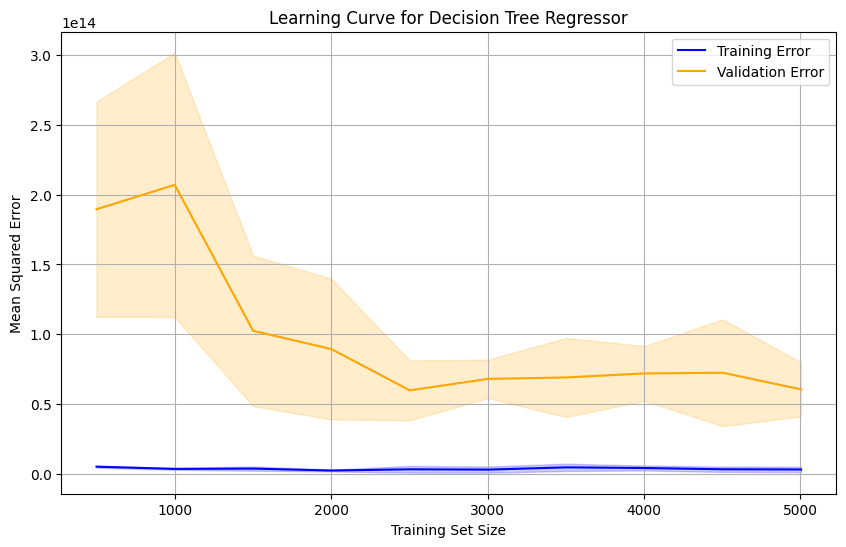

In [77]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_scaled,
    X=X_train,
    y=y_train,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),  # Use 10 different training sizes
    n_jobs=-1,
    random_state=42
)

train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = -np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Error', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, validation_mean, label='Validation Error', color='orange')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='orange', alpha=0.2)
plt.title('Learning Curve for Decision Tree Regressor')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()

# Testing

In [78]:
p = len(X_train.columns)
over_train_count = len(X_train2)
over_test_count = len(X_test2)
under_train_count = len(X_train3)
under_test_count = len(X_test3)

In [81]:
y_pred_train0 = best_original.predict(X_train0)
y_pred_test0 = best_original.predict(X_test0)

mse_train0 = mean_squared_error(y_train0, y_pred_train0)
mse_test0 = mean_squared_error(y_test0, y_pred_test0)

rmse_train0 = mse_train0 ** 0.5
rmse_test0 = mse_test0 ** 0.5

r2_train0 = r2_score(y_train0, y_pred_train0)
r2_test0 = r2_score(y_test0, y_pred_test0)

adj_r2_train0 = 1 - ((1 - r2_train0) * (train_count - 1) / (train_count - p -1))
adj_r2_test0 = 1 - ((1 - r2_test0) * (test_count - 1) / (test_count - p -1))

mae_train0 = mean_absolute_error(y_train0, y_pred_train0)
mae_test0 = mean_absolute_error(y_test0, y_pred_test0)


print("Decision Tree Regressor on Original Data")
print(f'MSE Train: {mse_train0}, MSE Test: {mse_test0}')
print(f'RMSE Train: {rmse_train0}, RMSE Test: {rmse_test0}')
print(f'R2 Train: {r2_train0}, R2 Test: {r2_test0}')
print(f'Adjusted R2 Train: {adj_r2_train0}, Adjusted R2 Test: {adj_r2_test0}')
print(f'MAE Train: {mae_train0}, MAE Test: {mae_test0}')

Decision Tree Regressor on Original Data
MSE Train: 3192439897317.046, MSE Test: 7859160104188.375
RMSE Train: 1786740.0195095665, RMSE Test: 2803419.359316115
R2 Train: 0.9977774847286836, R2 Test: 0.9932728184831365
Adjusted R2 Train: 0.9977739258571522, Adjusted R2 Test: 0.9932295011520557
MAE Train: 250733.73013566426, MAE Test: 929711.6368286443


In [82]:
y_pred_train1 = best_scaled.predict(X_train)
y_pred_test1 = best_scaled.predict(X_test)

mse_train1 = mean_squared_error(y_train, y_pred_train1)
mse_test1 = mean_squared_error(y_test, y_pred_test1)

rmse_train1 = mse_train1 ** 0.5
rmse_test1 = mse_test1 ** 0.5

r2_train1 = r2_score(y_train, y_pred_train1)
r2_test1 = r2_score(y_test, y_pred_test1)

adj_r2_train1 = 1 - ((1 - r2_train1) * (train_count - 1) / (train_count - p -1))
adj_r2_test1 = 1 - ((1 - r2_test1) * (test_count - 1) / (test_count - p -1))

mae_train1 = mean_absolute_error(y_train, y_pred_train1)
mae_test1 = mean_absolute_error(y_test, y_pred_test1)


print("Decision Tree Regressor on Scaled Data")
print(f'MSE Train: {mse_train1}, MSE Test: {mse_test1}')
print(f'RMSE Train: {rmse_train1}, RMSE Test: {rmse_test1}')
print(f'R2 Train: {r2_train1}, R2 Test: {r2_test1}')
print(f'Adjusted R2 Train: {adj_r2_train1}, Adjusted R2 Test: {adj_r2_test1}')
print(f'MAE Train: {mae_train1}, MAE Test: {mae_test1}')

Decision Tree Regressor on Scaled Data
MSE Train: 3190970046701.833, MSE Test: 7988000906911.587
RMSE Train: 1786328.6502493971, RMSE Test: 2826305.168751525
R2 Train: 0.9977785080104191, R2 Test: 0.9931625350107035
Adjusted R2 Train: 0.9977749507774494, Adjusted R2 Test: 0.9931185075477975
MAE Train: 250383.39194373402, MAE Test: 936024.3499573742


In [83]:
y_pred_train2 = best_over.predict(X_train2)
y_pred_test2 = best_over.predict(X_test2)

mse_train2 = mean_squared_error(y_train2, y_pred_train2)
mse_test2 = mean_squared_error(y_test2, y_pred_test2)

rmse_train2 = mse_train2 ** 0.5
rmse_test2 = mse_test2 ** 0.5

r2_train2 = r2_score(y_train2, y_pred_train2)
r2_test2 = r2_score(y_test2, y_pred_test2)

adj_r2_train2 = 1 - ((1 - r2_train2) * (over_train_count - 1) / (over_train_count - p -1))
adj_r2_test2 = 1 - ((1 - r2_test2) * (over_test_count - 1) / (over_test_count - p -1))

mae_train2 = mean_absolute_error(y_train2, y_pred_train2)
mae_test2 = mean_absolute_error(y_test2, y_pred_test2)


print("Decision Tree Regressor on Over-Sampled Data")
print(f'MSE Train: {mse_train2}, MSE Test: {mse_test2}')
print(f'RMSE Train: {rmse_train2}, RMSE Test: {rmse_test2}')
print(f'R2 Train: {r2_train2}, R2 Test: {r2_test2}')
print(f'Adjusted R2 Train: {adj_r2_train2}, Adjusted R2 Test: {adj_r2_test2}')
print(f'MAE Train: {mae_train2}, MAE Test: {mae_test2}')

Decision Tree Regressor on Over-Sampled Data
MSE Train: 26675034919.138054, MSE Test: 444262059203.01483
RMSE Train: 163324.93661146192, RMSE Test: 666529.8636993056
R2 Train: 0.9999911201289802, R2 Test: 0.9998615873572727
Adjusted R2 Train: 0.9999911143496955, Adjusted R2 Test: 0.9998612262494128
MAE Train: 30435.527228581337, MAE Test: 158169.59330558448


In [99]:
y_pred_train3 = best_under.predict(X_train3)
y_pred_test3 = best_under.predict(X_test3)

mse_train3 = mean_squared_error(y_train3, y_pred_train3)
mse_test3 = mean_squared_error(y_test3, y_pred_test3)

rmse_train3 = mse_train3 ** 0.5
rmse_test3 = mse_test3 ** 0.5

r2_train3 = r2_score(y_train3, y_pred_train3)
r2_test3 = r2_score(y_test3, y_pred_test3)

adj_r2_train3 = 1 - ((1 - r2_train3) * (under_train_count - 1) / (under_train_count - p -1))
adj_r2_test3 = 1 - ((1 - r2_test3) * (under_test_count - 1) / (under_test_count - p -1))

mae_train3 = mean_absolute_error(y_train3, y_pred_train3)
mae_test3 = mean_absolute_error(y_test3, y_pred_test3)


print("Decision Tree Regressor on UnderSampled Data")
print(f'MSE Train: {mse_train3}, MSE Test: {mse_test3}')
print(f'RMSE Train: {rmse_train3}, RMSE Test: {rmse_test3}')
print(f'R2 Train: {r2_train3}, R2 Test: {r2_test3}')
print(f'Adjusted R2 Train: {adj_r2_train3}, Adjusted R2 Test: {adj_r2_test3}')
print(f'MAE Train: {mae_train3}, MAE Test: {mae_test3}')

Decision Tree Regressor on UnderSampled Data
MSE Train: 19135900186589.547, MSE Test: 63479796426876.57
RMSE Train: 4374459.987997324, RMSE Test: 7967420.939480766
R2 Train: 0.9938207370239615, R2 Test: 0.9739193845447782
Adjusted R2 Train: 0.9937887863363914, Adjusted R2 Test: 0.9733714724553828
MAE Train: 1385049.8714652956, MAE Test: 3806381.930184805


In [85]:
residual0 = y_test0 - y_pred_test0
residual1 = y_test - y_pred_test1
residual2 = y_test2 - y_pred_test2
residual3 = y_test3 - y_pred_test3

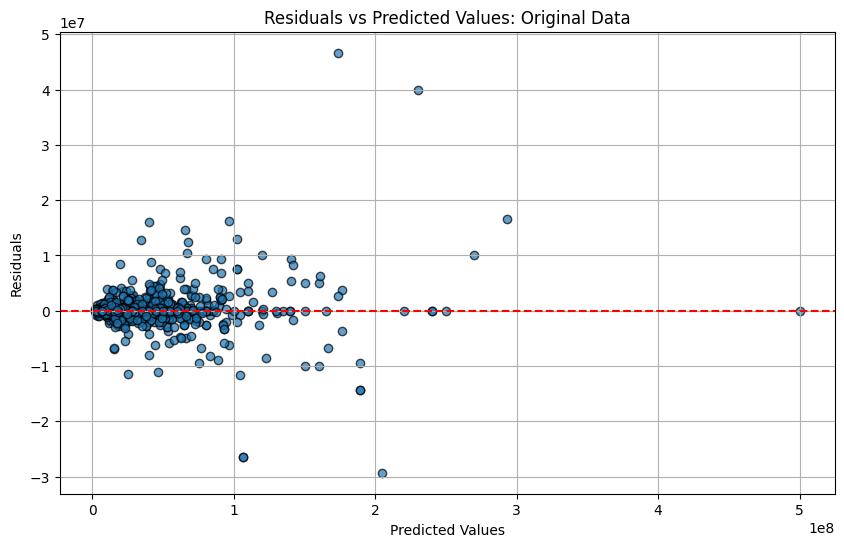

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test0, residual0, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values: Original Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

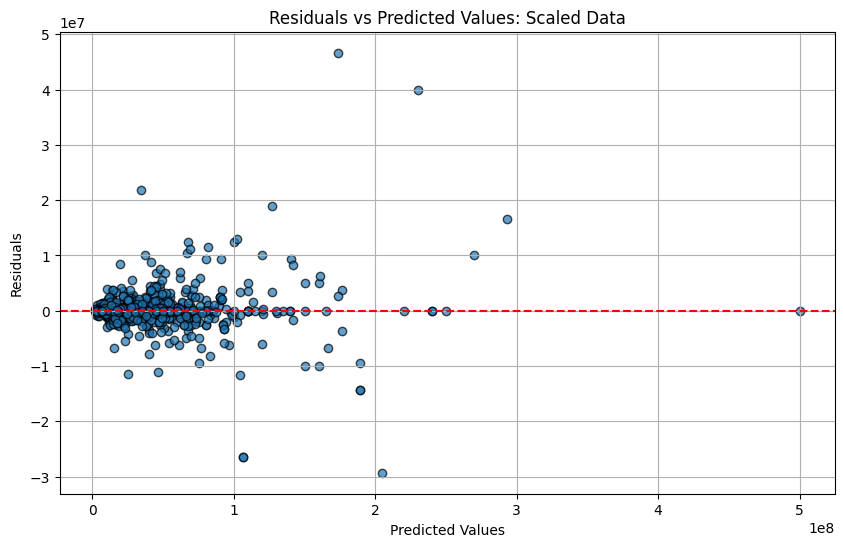

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test1, residual1, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values: Scaled Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

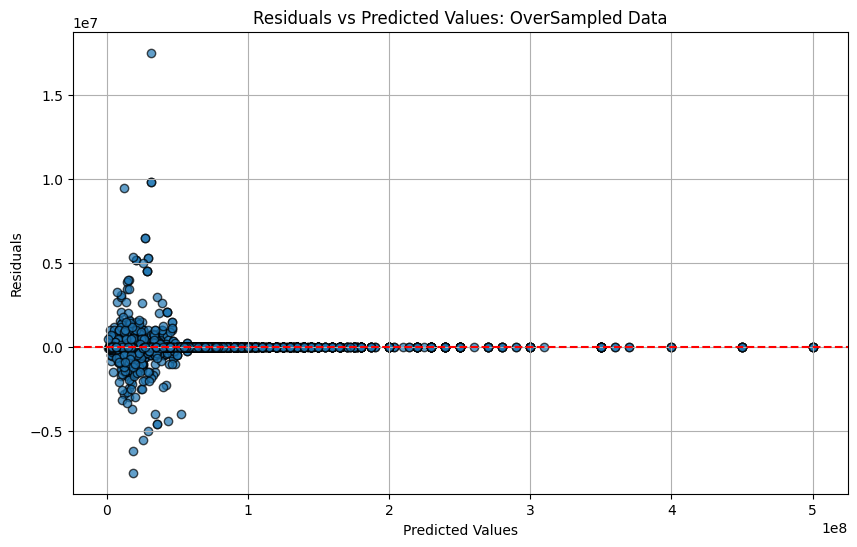

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test2, residual2, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values: OverSampled Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

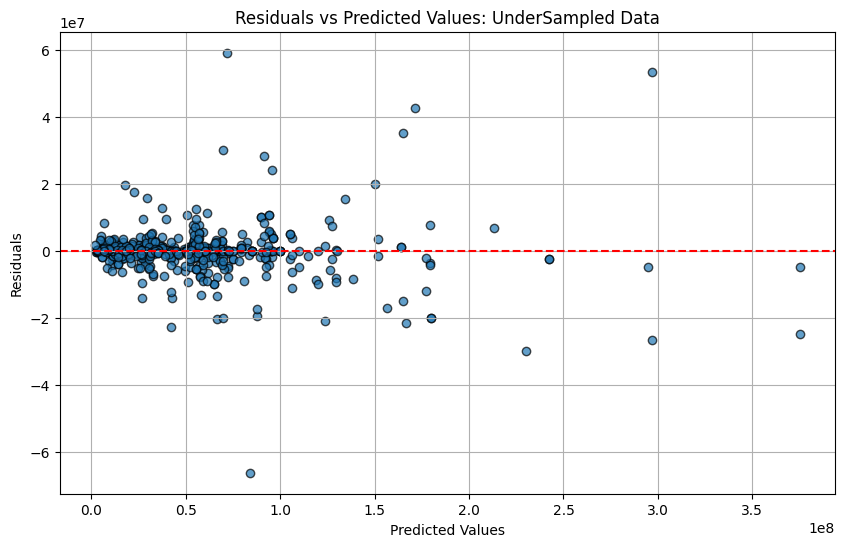

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test3, residual3, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values: UnderSampled Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

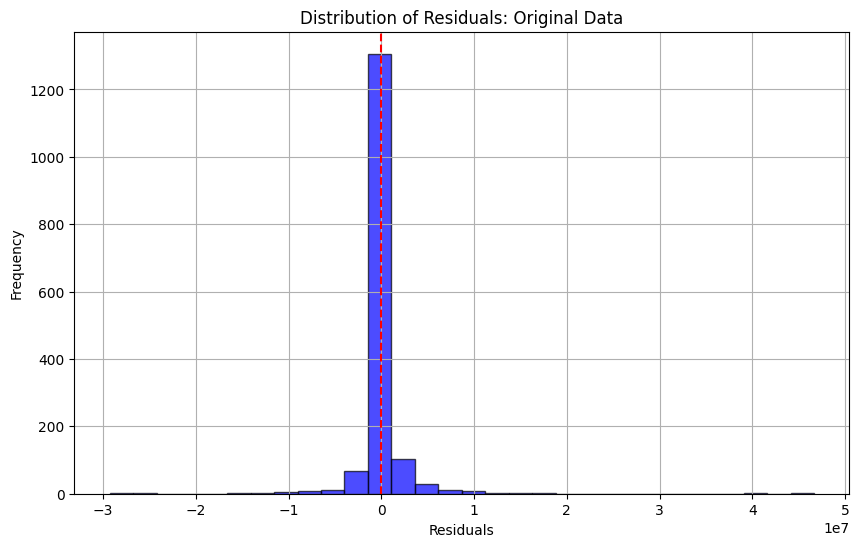

In [91]:
plt.figure(figsize=(10, 6))
plt.hist(residual0, bins=30, color='blue', edgecolor='k', alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Residuals: Original Data')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

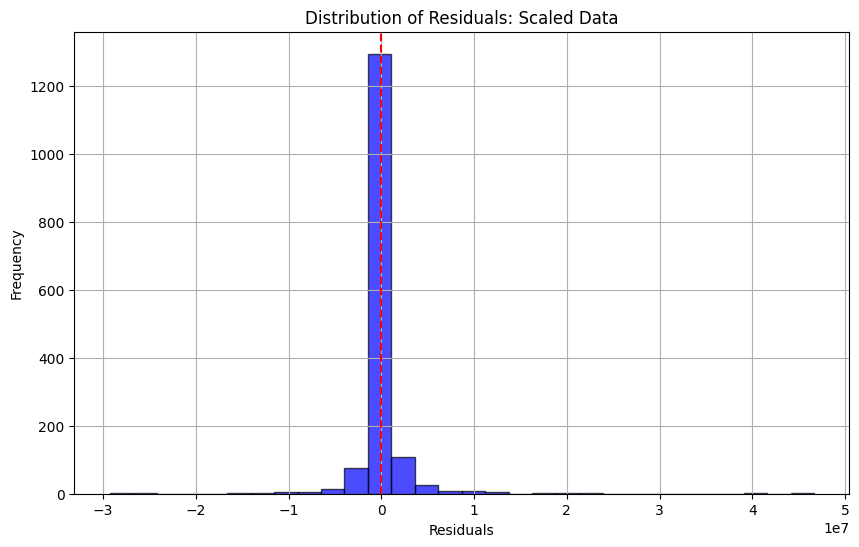

In [92]:
plt.figure(figsize=(10, 6))
plt.hist(residual1, bins=30, color='blue', edgecolor='k', alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Residuals: Scaled Data')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

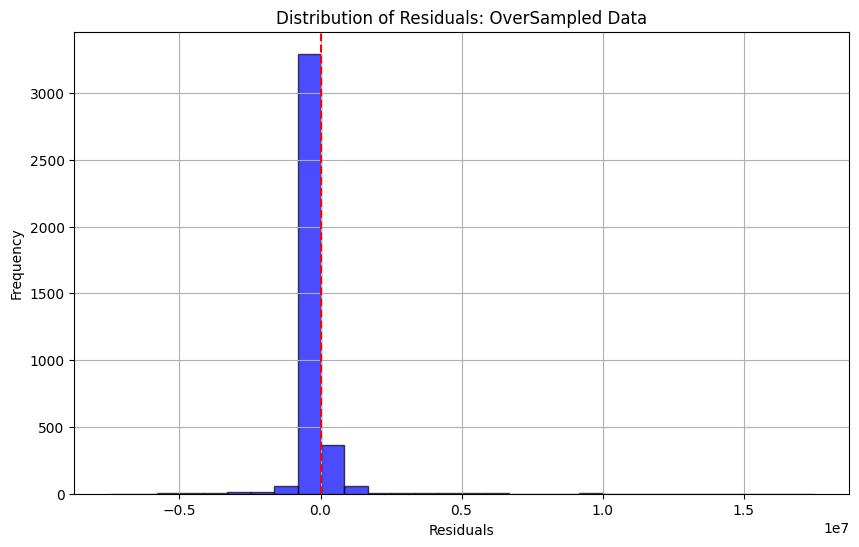

In [100]:
plt.figure(figsize=(10, 6))
plt.hist(residual2, bins=30, color='blue', edgecolor='k', alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Residuals: OverSampled Data')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


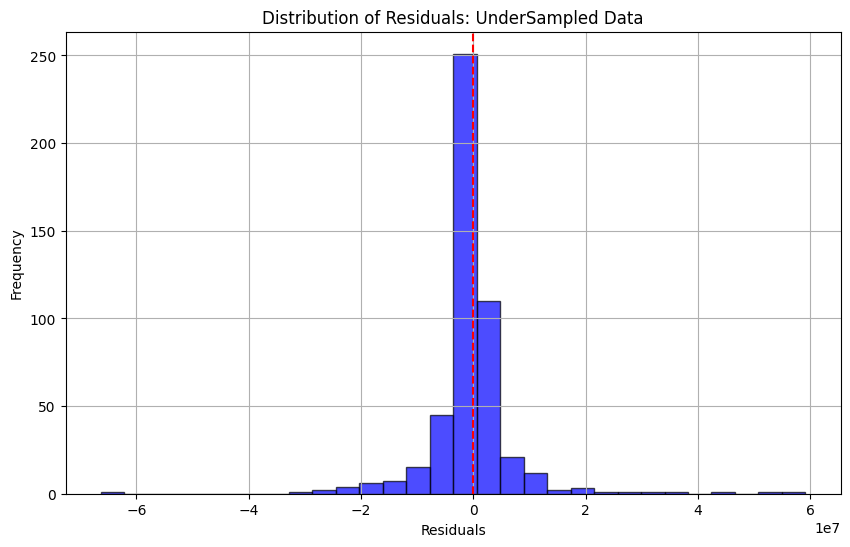

In [101]:
plt.figure(figsize=(10, 6))
plt.hist(residual3, bins=30, color='blue', edgecolor='k', alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Residuals: UnderSampled Data')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


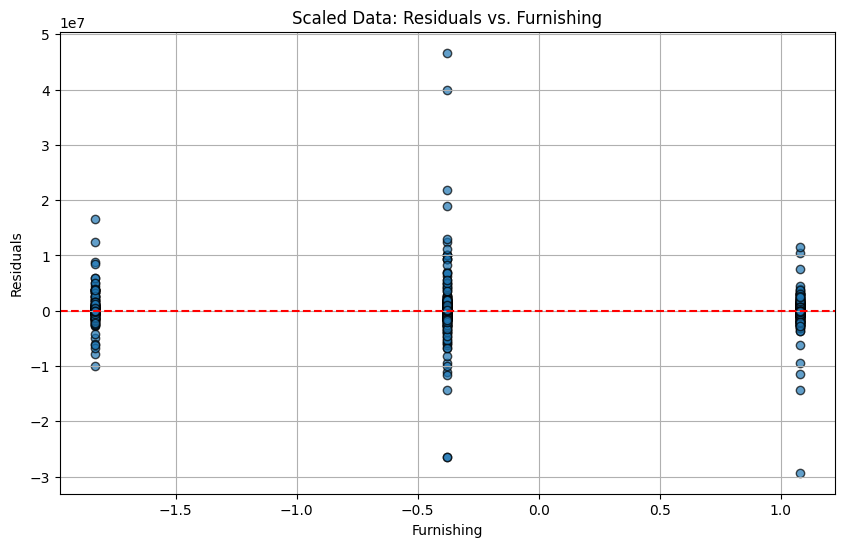

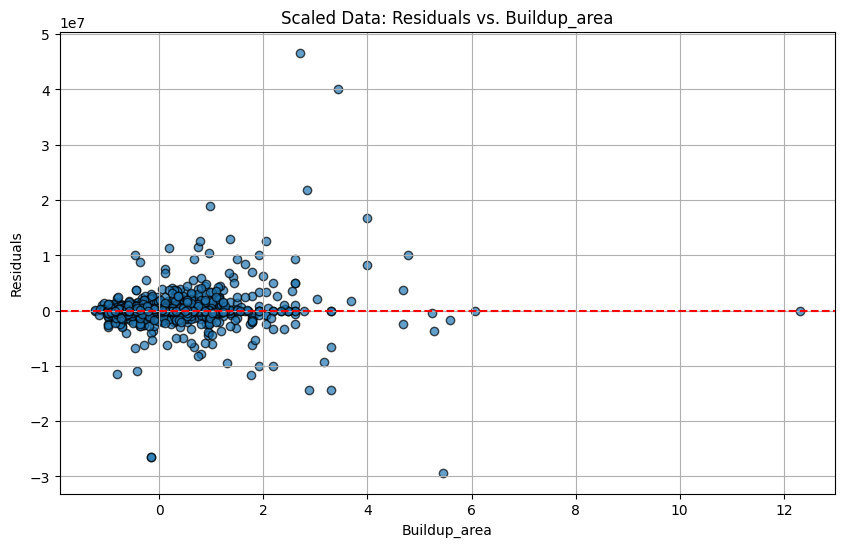

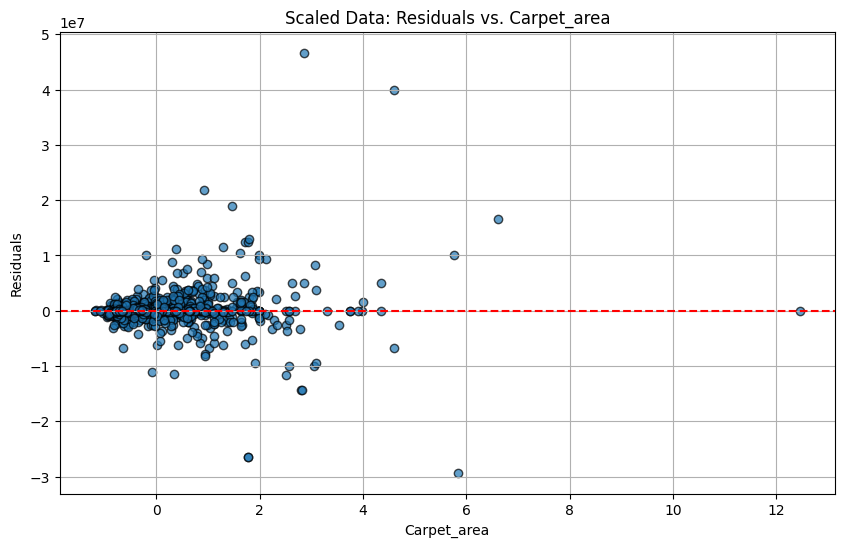

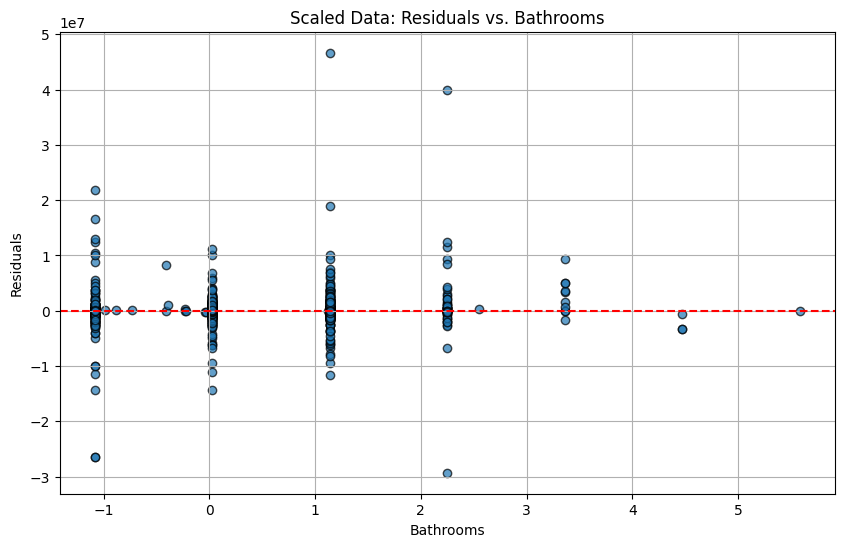

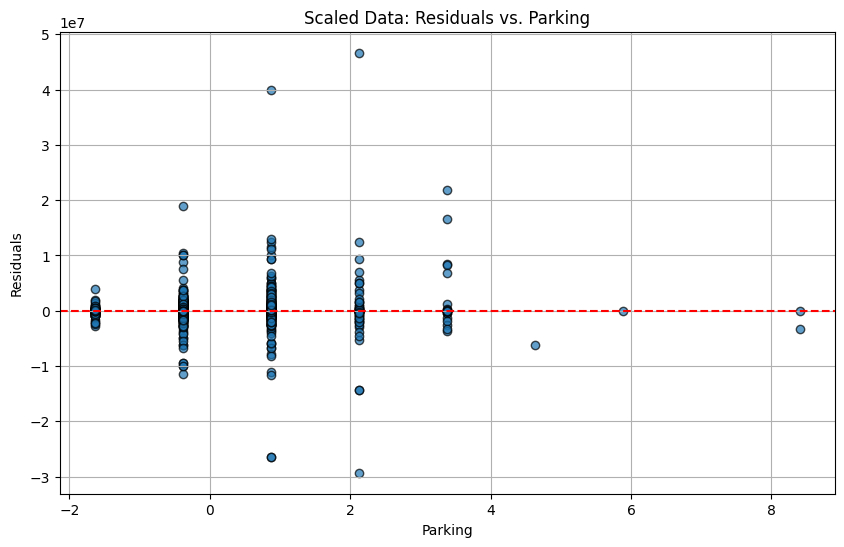

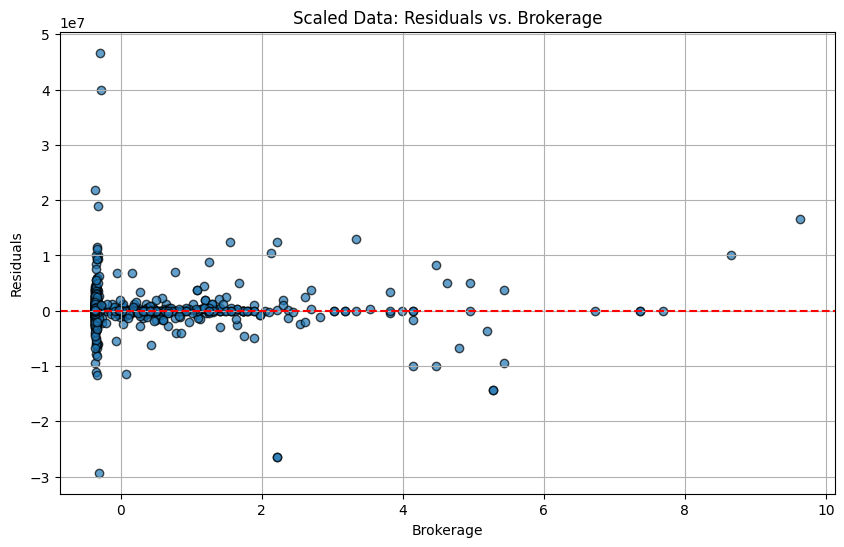

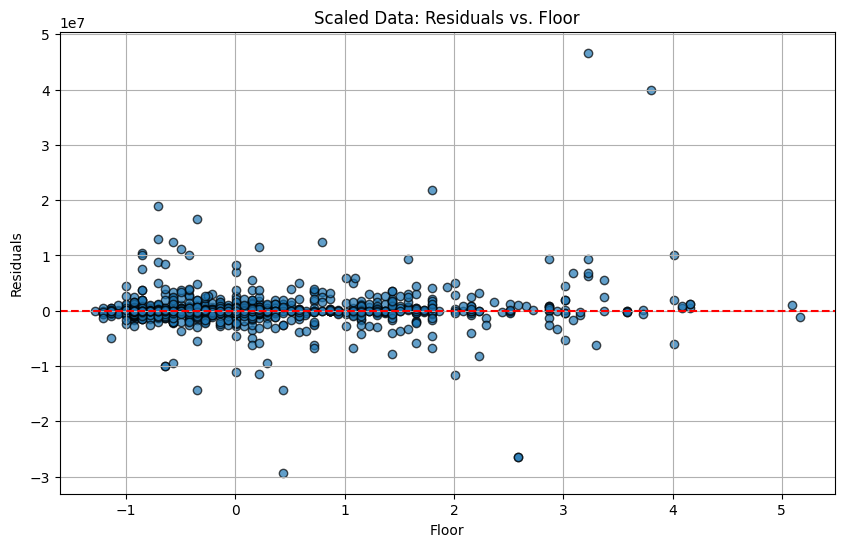

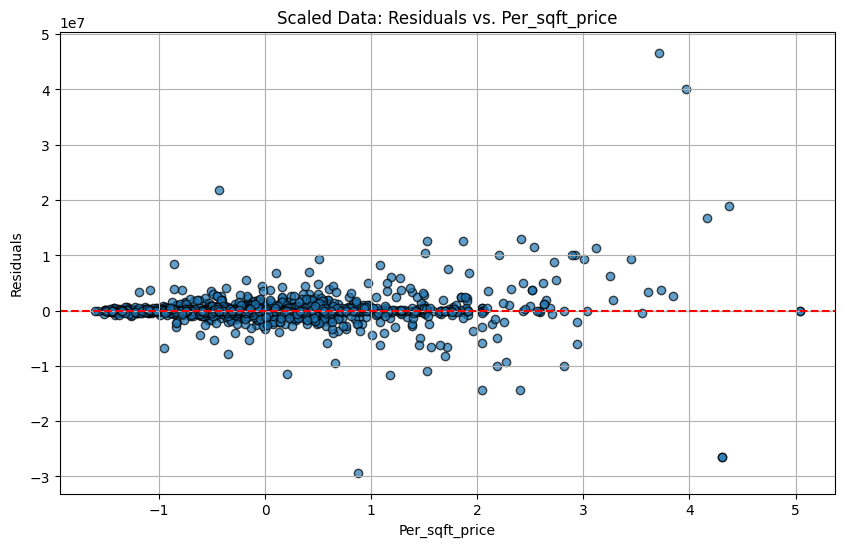

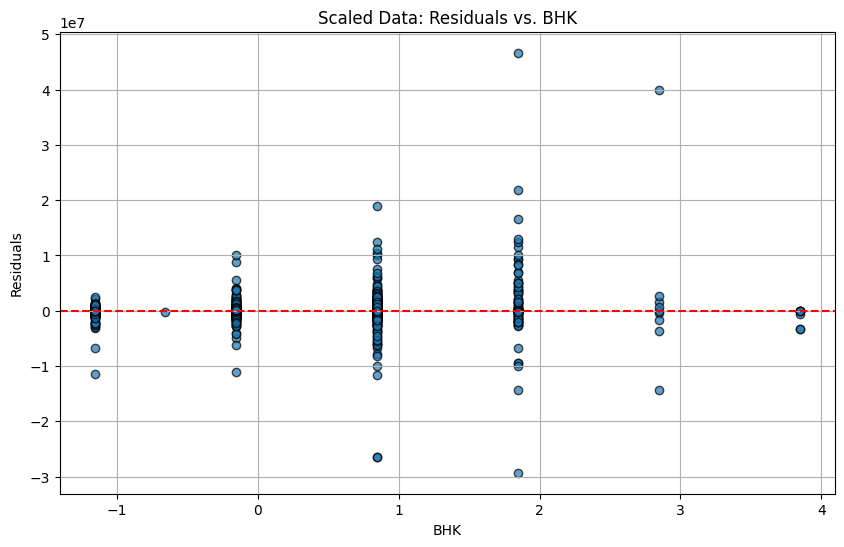

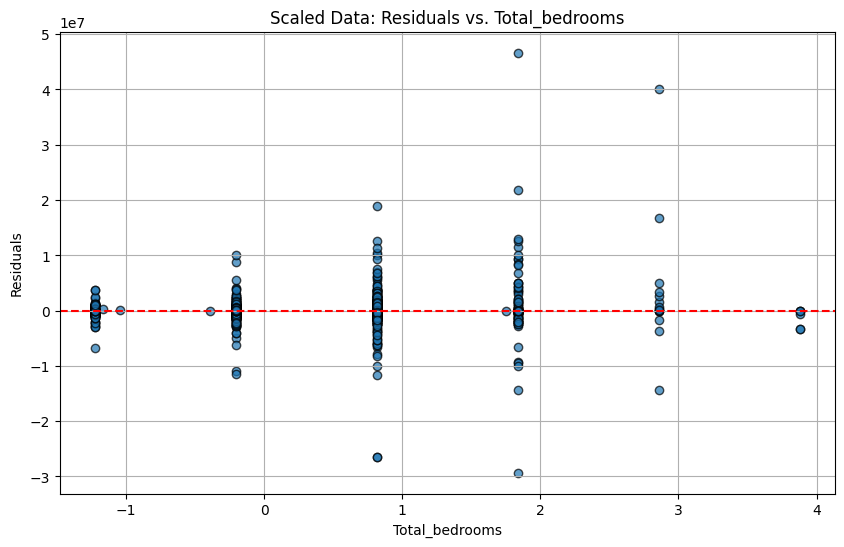

In [76]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[feature], residual1, alpha=0.7, edgecolor='k')
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Scaled Data: Residuals vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()

In [95]:
feature_importances = pd.Series(best_scaled.feature_importances_, index=X_train.columns)

top_3_features = feature_importances.sort_values(ascending=False).head(3).index.tolist()
print(f"Top 3 Important Features: {top_3_features}")

Top 3 Important Features: ['Carpet_area', 'Per_sqft_price', 'Brokerage']


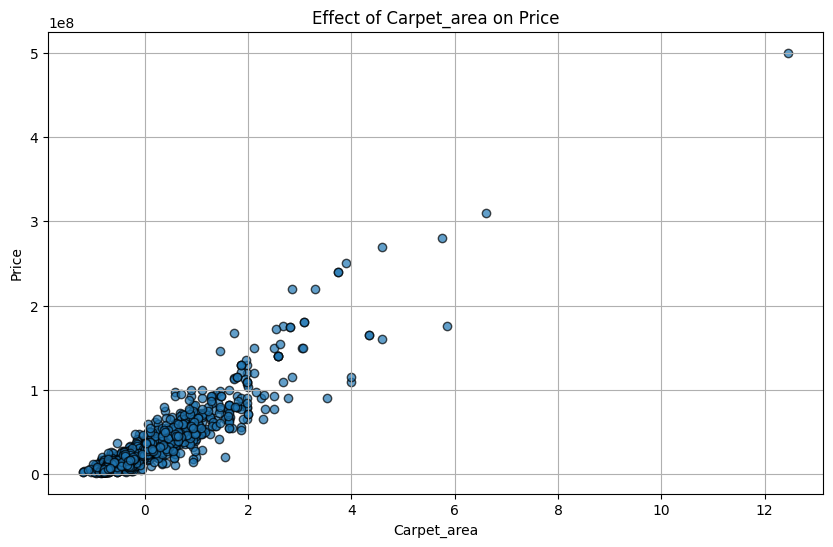

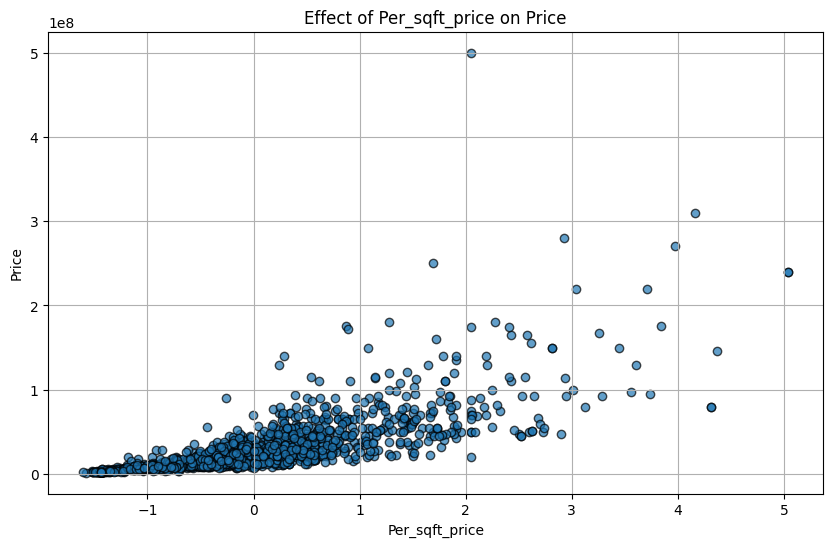

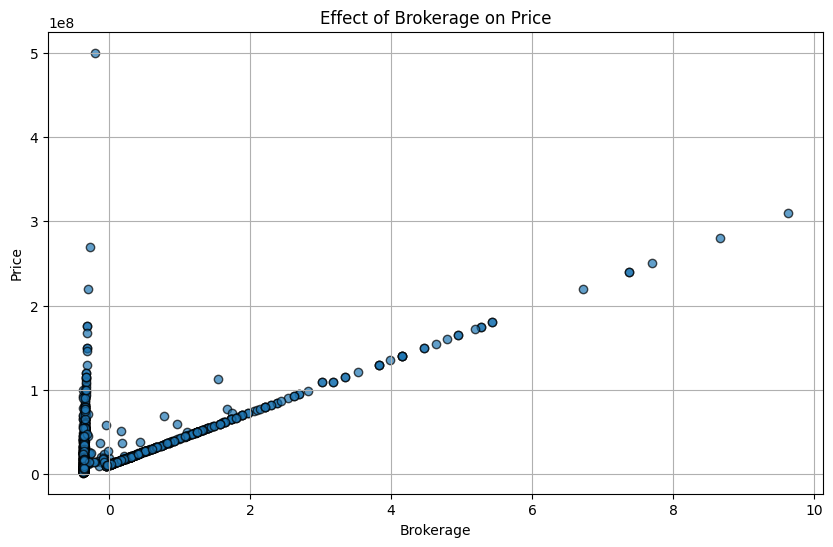

In [96]:
for feature in top_3_features:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[feature], y_test, alpha=0.7, edgecolor='k')
    plt.title(f'Effect of {feature} on Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

In [98]:
rmse_results = {}

for feature in top_3_features:
    X_train_single = X_train[[feature]]
    X_test_single = X_test[[feature]]

    dt_single = DecisionTreeRegressor(random_state=42)
    dt_single.fit(X_train_single, y_train)

    y_pred_single = dt_single.predict(X_test_single)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_single))
    rmse_results[feature] = rmse

    print(f"Feature: {feature}, RMSE: {rmse:.4f}")

Feature: Carpet_area, RMSE: 12103023.8250
Feature: Per_sqft_price, RMSE: 28473129.0568
Feature: Brokerage, RMSE: 19276791.8594


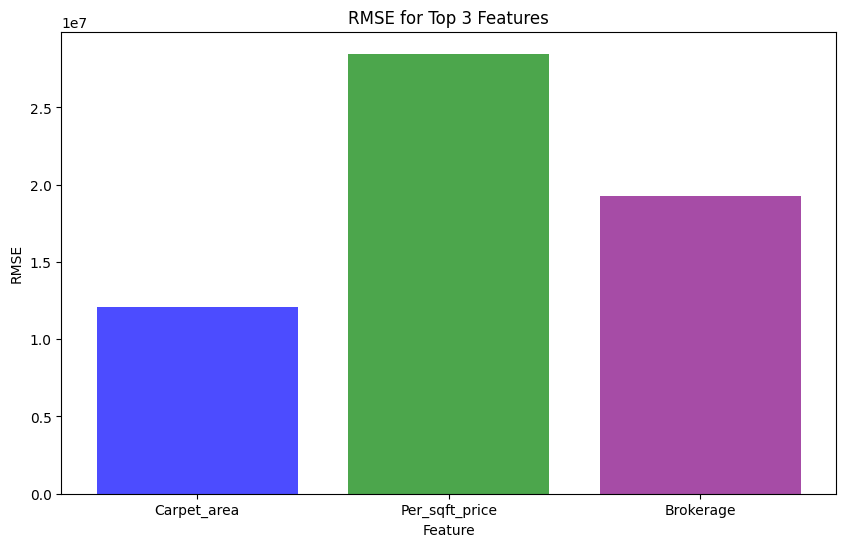

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(rmse_results.keys(), rmse_results.values(), color=['blue', 'green', 'purple'], alpha=0.7)
plt.title('RMSE for Top 3 Features')
plt.xlabel('Feature')
plt.ylabel('RMSE')
plt.show()